# Table of Contents
 <p><div class="lev2 toc-item"><a data-toc-modified-id="Import-dadi-on-all-engines-01" href="#Import-dadi-on-all-engines"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Import dadi on all engines</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Load-1D-SFS-02" href="#Load-1D-SFS"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Load 1D SFS</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Exponential-growth-model-03" href="#Exponential-growth-model"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Exponential growth model</a></div><div class="lev3 toc-item"><a data-toc-modified-id="create-combinations-of-starting-values-for-optimisation-031" href="#create-combinations-of-starting-values-for-optimisation"><span class="toc-item-num">0.3.1&nbsp;&nbsp;</span>create combinations of starting values for optimisation</a></div><div class="lev3 toc-item"><a data-toc-modified-id="ery-032" href="#ery"><span class="toc-item-num">0.3.2&nbsp;&nbsp;</span><em>ery</em></a></div><div class="lev4 toc-item"><a data-toc-modified-id="run-optimisation-on-1D-SFS-of-0321" href="#run-optimisation-on-1D-SFS-of"><span class="toc-item-num">0.3.2.1&nbsp;&nbsp;</span>run optimisation on 1D SFS of</a></div><div class="lev4 toc-item"><a data-toc-modified-id="calculate-log-likelihood-of-each-set-of-optimised-parameters-0322" href="#calculate-log-likelihood-of-each-set-of-optimised-parameters"><span class="toc-item-num">0.3.2.2&nbsp;&nbsp;</span>calculate log likelihood of each set of optimised parameters</a></div><div class="lev4 toc-item"><a data-toc-modified-id="residual-plots-0323" href="#residual-plots"><span class="toc-item-num">0.3.2.3&nbsp;&nbsp;</span>residual plots</a></div><div class="lev4 toc-item"><a data-toc-modified-id="different-optimisation-algorithms-0324" href="#different-optimisation-algorithms"><span class="toc-item-num">0.3.2.4&nbsp;&nbsp;</span>different optimisation algorithms</a></div><div class="lev3 toc-item"><a data-toc-modified-id="par-033" href="#par"><span class="toc-item-num">0.3.3&nbsp;&nbsp;</span><em>par</em></a></div><div class="lev4 toc-item"><a data-toc-modified-id="run-optimisation-on-1D-SFS-of-par-0331" href="#run-optimisation-on-1D-SFS-of-par"><span class="toc-item-num">0.3.3.1&nbsp;&nbsp;</span>run optimisation on 1D SFS of par</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Recommended-parameter-boundaries-1" href="#Recommended-parameter-boundaries"><span class="toc-item-num">1&nbsp;&nbsp;</span>Recommended parameter boundaries</a></div><div class="lev1 toc-item"><a data-toc-modified-id="Restart-analysis-2" href="#Restart-analysis"><span class="toc-item-num">2&nbsp;&nbsp;</span>Restart analysis</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Ery-21" href="#Ery"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ery</a></div><div class="lev2 toc-item"><a data-toc-modified-id="Par-22" href="#Par"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Par</a></div><div class="lev3 toc-item"><a data-toc-modified-id="restart-221" href="#restart"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>restart</a></div>

## Import dadi on all engines

The magic commands become automaticaly available when you create a client:

In [1]:
from ipyparallel import Client

cl = Client()

cl.ids

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [2]:
cl[:].targets

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:
%%px --noblock
# run a whole cell in non-blocking mode, by default on all engines
# note: the magic has to be at the top of the cell

import time
time.sleep(1)
time.time()

<AsyncResult: execute>

In [4]:
%pxresult

# get the result from the AsyncResult object

Out[0:1]: 1491481734.835568

Out[1:1]: 1491481734.836249

Out[2:1]: 1491481734.838302

Out[3:1]: 1491481734.840656

Out[4:1]: 1491481734.842219

Out[5:1]: 1491481734.842989

Out[6:1]: 1491481734.841713

Out[7:1]: 1491481734.842441

Out[8:1]: 1491481734.844283

Out[9:1]: 1491481734.843678

Out[10:1]: 1491481734.845353

In [5]:
%%px --local

# run whole cell on all engines a well as in the local IPython session

import sys
sys.path.insert(0, '/home/claudius/Downloads/dadi')
sys.path[0]

'/home/claudius/Downloads/dadi'

Out[0:2]: '/home/claudius/Downloads/dadi'

Out[1:2]: '/home/claudius/Downloads/dadi'

Out[2:2]: '/home/claudius/Downloads/dadi'

Out[3:2]: '/home/claudius/Downloads/dadi'

Out[4:2]: '/home/claudius/Downloads/dadi'

Out[5:2]: '/home/claudius/Downloads/dadi'

Out[6:2]: '/home/claudius/Downloads/dadi'

Out[7:2]: '/home/claudius/Downloads/dadi'

Out[8:2]: '/home/claudius/Downloads/dadi'

Out[9:2]: '/home/claudius/Downloads/dadi'

Out[10:2]: '/home/claudius/Downloads/dadi'

In [6]:
%%px --local

import dadi

Dadi should now be imported on all remote engines as well as locally.

In [7]:
%whos

Variable   Type             Data/Info
-------------------------------------
Client     MetaHasTraits    <class 'ipyparallel.client.client.Client'>
cl         Client           <ipyparallel.client.clien<...>object at 0x7f90dd08d550>
dadi       module           <module 'dadi' from '/hom<...>/dadi/dadi/__init__.pyc'>
sys        module           <module 'sys' (built-in)>


The remote namespace can be checked with:

In [8]:
%px %who

[stdout:0] dadi	 sys	 time	 
[stdout:1] dadi	 sys	 time	 
[stdout:2] dadi	 sys	 time	 
[stdout:3] dadi	 sys	 time	 
[stdout:4] dadi	 sys	 time	 
[stdout:5] dadi	 sys	 time	 
[stdout:6] dadi	 sys	 time	 
[stdout:7] dadi	 sys	 time	 
[stdout:8] dadi	 sys	 time	 
[stdout:9] dadi	 sys	 time	 
[stdout:10] dadi	 sys	 time	 


As can be seen, dadi is imported on all engines.

## Load 1D SFS

Like the dadi module, I would like to load the 1D folded SFS's of par and ery into the namespaces of the local IPython session as well as on all engines.

In [9]:
%ll

total 716
-rw-rw-r-- 1 claudius 164043 Apr  6 09:26 01_dadi_in_parallel-magic_commands.ipynb
-rw-rw-r-- 1 claudius 434843 Apr  5 11:07 1D_models.ipynb
drwxrwxr-x 4 claudius   4096 Mar 24 20:08 dadiExercises/
-rw-rw-r-- 1 claudius  36308 Apr  3 20:33 ery_fold_comp.png
-rw-rw-r-- 1 claudius   3560 Mar 25 08:40 EryPar.FOLDED.2dsfs
-rw-rw-r-- 1 claudius    433 Mar 24 20:15 ERY.unfolded.sfs
-rw-rw-r-- 1 claudius    421 Mar 24 20:14 ERY.unfolded.sfs~
-rw-rw-r-- 1 claudius  23924 Apr  6 09:25 exp_growth_optim_res.pickle
-rw-rw-r-- 1 claudius  37242 Apr  3 20:35 par_fold_comp.png
-rw-rw-r-- 1 claudius    421 Mar 24 20:16 PAR.unfolded.sfs
-rw-rw-r-- 1 claudius    409 Mar 24 20:15 PAR.unfolded.sfs~


In [10]:
% ll dadiExercises/

total 33676
lrwxrwxrwx 1 claudius       53 Feb 17 15:37 ERY.FOLDED.sfs -> /data3/claudius/Big_Data/ANGSD/SFS/ERY/ERY.FOLDED.sfs
-rw-rw-r-- 1 claudius      499 Mar 24 14:04 ERY.FOLDED.sfs.dadi_format
-rw-rw-r-- 1 claudius      499 Mar 24 14:02 ERY.FOLDED.sfs.dadi_format~
lrwxrwxrwx 1 claudius       37 Feb 18 17:46 EryPar.unfolded.2dsfs -> ../../ANGSD/FST/EryPar.unfolded.2dsfs
-rw-rw-r-- 1 claudius    13051 Feb 18 19:00 EryPar.unfolded.2dsfs.dadi_format
-rw-rw-r-- 1 claudius    13051 Feb 18 18:31 EryPar.unfolded.2dsfs.dadi_format~
drwxrwxr-x 5 claudius     4096 Feb 17 13:45 examples/
-rw-rw-r-- 1 claudius   155251 Mar 22 12:37 example_YRI_CEU.ipynb
-rw-rw-r-- 1 claudius   619518 Mar 21 11:09 First_Steps_with_dadi.ipynb
-rw-rw-r-- 1 claudius     1012 Mar 16 09:54 new.bib
lrwxrwxrwx 1 claudius       53 Feb 17 15:37 PAR.FOLDED.sfs -> /data3/claudius/Big_Data/ANGSD/SFS/PAR/PAR.FOLDED.sfs
-rw-rw-r-- 1 claudius      486 Mar 24 20:08 PAR.FOLDED.sfs.dadi_format
-rw-rw-r-- 1 claudius      450 Mar

In [11]:
! cat dadiExercises/ERY.FOLDED.sfs.dadi_format

# this is the ML estimate of the folded sample frequency spectrum for erythropus, estimated with realSFS of ANGSD
# this is the spectrum in dadi format (see section 3.1 of the manual)
37 folded
1594818.222085 7833.038690 7414.699839 4109.279415 3614.717256 3095.973324 2031.460887 1584.656928 2583.652317 1142.075255 1052.346021 1765.773415 1255.138799 1072.516527 1417.916128 395.750470 1947.087637 367.072082 966.622924 
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1  


In [12]:
! cat dadiExercises/PAR.FOLDED.sfs.dadi_format

# this is the ML estimate of the folded sample frequency spectrum for parallelus, estimated with realSFS of ANGSD
# this is the spectrum in dadi format (see section 3.1 of the manual)
37 folded
1171183.294811 8409.256970 12008.479728 5476.826032 3090.791731 2755.941992 1804.378260 357.199759 2552.273719 832.442184 873.647652 0.001111 2420.101426 0.010094 910.498821 0.725863 1506.959669 232.289352 523.880826 
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


In [13]:
%%px --local

# import 1D spectrum of ery on all engines:
fs_ery = dadi.Spectrum.from_file('dadiExercises/ERY.FOLDED.sfs.dadi_format')

# import 1D spectrum of ery on all engines:
fs_par = dadi.Spectrum.from_file('dadiExercises/PAR.FOLDED.sfs.dadi_format')

In [14]:
%px %who

[stdout:0] dadi	 fs_ery	 fs_par	 sys	 time	 
[stdout:1] dadi	 fs_ery	 fs_par	 sys	 time	 
[stdout:2] dadi	 fs_ery	 fs_par	 sys	 time	 
[stdout:3] dadi	 fs_ery	 fs_par	 sys	 time	 
[stdout:4] dadi	 fs_ery	 fs_par	 sys	 time	 
[stdout:5] dadi	 fs_ery	 fs_par	 sys	 time	 
[stdout:6] dadi	 fs_ery	 fs_par	 sys	 time	 
[stdout:7] dadi	 fs_ery	 fs_par	 sys	 time	 
[stdout:8] dadi	 fs_ery	 fs_par	 sys	 time	 
[stdout:9] dadi	 fs_ery	 fs_par	 sys	 time	 
[stdout:10] dadi	 fs_ery	 fs_par	 sys	 time	 


In [15]:
%who

Client	 cl	 dadi	 fs_ery	 fs_par	 sys	 


In [16]:
%%px --local

ns = fs_ery.sample_sizes # both populations have the same sample size

fs_ery.pop_ids = ['ery']
fs_par.pop_ids = ['par']

# setting the smallest grid size slightly larger than the largest population sample size (36)
pts_l = [50, 60, 70]

---

## Exponential growth model

In [10]:
%psource dadi.Demographics1D.growth

This model assumes that exponential growth (or decline) started some time $T$ in the past and the current effective population size is a multiple $\nu$ of the ancient populations size, i. e. before exponential growth began. So this model just estimates two parameters. If $\nu$ is estimated to be 1, this indicates that the population size hasn't changed (although see Myers2008). If it is below one, this indicates exponential population decline (how realistic is that?). If it is above 1, this indicates exponential population growth.

In [17]:
%%px --local

# create link to function that specifies a simple growth or decline model
func = dadi.Demographics1D.growth

# create extrapolating version of the function
func_ex = dadi.Numerics.make_extrap_log_func(func)

# set lower and upper bounds to nu and T
upper_bound = [100, 5]
lower_bound = [1e-3, 0]

In [18]:
%px %who

[stdout:0] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 ns	 pts_l	 sys	 
time	 upper_bound	 
[stdout:1] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 ns	 pts_l	 sys	 
time	 upper_bound	 
[stdout:2] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 ns	 pts_l	 sys	 
time	 upper_bound	 
[stdout:3] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 ns	 pts_l	 sys	 
time	 upper_bound	 
[stdout:4] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 ns	 pts_l	 sys	 
time	 upper_bound	 
[stdout:5] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 ns	 pts_l	 sys	 
time	 upper_bound	 
[stdout:6] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 ns	 pts_l	 sys	 
time	 upper_bound	 
[stdout:7] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 ns	 pts_l	 sys	 
time	 upper_bound	 
[stdout:8] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 ns	 pts_l	 sys	 
time	 upper_bound	 
[stdout:9] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 ns	 pts_l	 sys	 
time	 upper_bound	 
[stdout:10

### create combinations of starting values for optimisation

In [22]:
from itertools import product
import numpy as np
from __future__ import print_function

# create range of starting values for nu and T, evenly distributed in log space
p0_nu = np.logspace(-3, np.log10(50), base=10.0, num=10)
p0_T = np.logspace(-3, np.log10(2), base=10, num=10)

# create all possible pairwise combinations of nu and T
i = 0
num_comb = len(p0_nu)*len(p0_T)
for p0 in product(p0_nu, p0_T):
    i+=1
    if i>20 and i<=(num_comb-20): 
        continue # continue with the next iteration of the loop
    print( i , p0 )
print("The total number of parameter combinations is ", i)

1 (0.001, 0.001)
2 (0.001, 0.0023269181687763617)
3 (0.001, 0.0054145481641815433)
4 (0.001, 0.012599210498948734)
5 (0.001, 0.029317331822241718)
6 (0.001, 0.068219032077219688)
7 (0.001, 0.15874010519682002)
8 (0.001, 0.36937523489595186)
9 (0.001, 0.85950594517542678)
10 (0.001, 2.0)
11 (0.0033274211919892436, 0.001)
12 (0.0033274211919892436, 0.0023269181687763617)
13 (0.0033274211919892436, 0.0054145481641815433)
14 (0.0033274211919892436, 0.012599210498948734)
15 (0.0033274211919892436, 0.029317331822241718)
16 (0.0033274211919892436, 0.068219032077219688)
17 (0.0033274211919892436, 0.15874010519682002)
18 (0.0033274211919892436, 0.36937523489595186)
19 (0.0033274211919892436, 0.85950594517542678)
20 (0.0033274211919892436, 2.0)
81 (15.026651907000801, 0.001)
82 (15.026651907000801, 0.0023269181687763617)
83 (15.026651907000801, 0.0054145481641815433)
84 (15.026651907000801, 0.012599210498948734)
85 (15.026651907000801, 0.029317331822241718)
86 (15.026651907000801, 0.068219032077

These starting values cover a very wide range of possible parameter combinations. This should be better than merely randomly perturbing a single parameter combination a certain number of times (and running the optimisation from those perturbed starting values).

### _ery_

#### run optimisation on 1D SFS of

In [23]:
# create load balanced view of engines

lbview = cl.load_balanced_view()

In [47]:
%pdoc dadi.Inference.optimize_log

dadi also offers other otimisation algorithms: `optimize_log_fmin` and `optimize_grid`.

In [25]:
# create parallel function for ery spectrum

@lbview.parallel(block=False)
def run_dadi_on_ery(p_init): # for the function to be called with map, it needs to have one input variable
    """
    p_init: initial parameter values to run optimisation from
    """
    # run optimisation of paramters
    popt = dadi.Inference.optimize_log(p0=p_init, data=fs_ery, model_func=func_ex, pts=pts_l, \
                                   lower_bound=lower_bound, upper_bound=upper_bound, \
                                   verbose=0, maxiter=100, full_output=False)
    return (p_init, popt) # returns a tuple with starting values and optimal nu and T

In [26]:
# run dadi in parallel on all combinations of starting values
ar = run_dadi_on_ery( product(p0_nu, p0_T) )
# wait for results to come in and print progress report
#ar.wait_interactive()

In [31]:
ar.progress

100

In [32]:
# run after optimisations have finished
ar.wall_time/60

7.776617983333334

It took 7 minutes to run these 100 optimisations.

In [40]:
# save optimsation results to file
# can be loaded back into another IPython session with: ar = pickle.load(filehandle)
# unfortunately, I cannot save the AsyncResult object with pickle (dill can save it, but emits a 
# "maximum recursion depth exceeded" error when I try to load the object from file again).
# I need to save the result as a plain list

import dill

with open("exp_growth_optim_res_ERY.pickle", "w") as fhandle:
    dill.dump(list(ar.get()), fhandle)

In [41]:
# this can now be loaded back from file into memory:
with open("exp_growth_optim_res_ERY.pickle", "r") as fhandle:
    ra = dill.load(fhandle)

In [39]:
?pickle

In [51]:
ar.get()[:10]

[[(0.01, 0.0)],
 array([ 0.01,  0.  ]),
 [(0.01, 0.22222222222222221)],
 array([ 0.02974472,  4.91552703]),
 [(0.01, 0.44444444444444442)],
 array([ 0.00100318,  0.09823147]),
 [(0.01, 0.66666666666666663)],
 array([ 0.00998765,  0.66740589]),
 [(0.01, 0.88888888888888884)],
 array([ 0.01101978,  0.7197859 ])]

The tuples returned from my parallel function have been flattened into one array. That's not nice.

In [46]:
?print # print_function from __future__

In [42]:
# print result of optimisations
for i, p in enumerate(ar):
    if (i+1) % 2:
        #print(i, p)
        print("starting values: nu = %.4f, T = %.6f" % (p[0][0], p[0][1]), end=" ==> ")
    else:
        #print(i, p)
        print("optim. values: nu = %.4f, T = %.6f" % (p[0], p[1]))    

starting values: nu = 0.0010, T = 0.001000 ==> optim. values: nu = 0.0011, T = 0.000000
starting values: nu = 0.0010, T = 0.002327 ==> optim. values: nu = 0.0011, T = 0.000023
starting values: nu = 0.0010, T = 0.005415 ==> optim. values: nu = 0.1280, T = 0.000005
starting values: nu = 0.0010, T = 0.012599 ==> optim. values: nu = 0.0010, T = 0.012599
starting values: nu = 0.0010, T = 0.029317 ==> optim. values: nu = 0.0010, T = 0.029317
starting values: nu = 0.0010, T = 0.068219 ==> optim. values: nu = 0.0010, T = 0.068219
starting values: nu = 0.0010, T = 0.158740 ==> optim. values: nu = 0.0012, T = 0.119777
starting values: nu = 0.0010, T = 0.369375 ==> optim. values: nu = 0.0019, T = 0.172487
starting values: nu = 0.0010, T = 0.859506 ==> optim. values: nu = 0.0010, T = 0.000023
starting values: nu = 0.0010, T = 2.000000 ==> optim. values: nu = 0.0043, T = 0.341027
starting values: nu = 0.0033, T = 0.001000 ==> optim. values: nu = 0.0014, T = 0.000107
starting values: nu = 0.0033, T 

Clearly, different starting parameter values lead to different optimised parameter values. There is a great variance in the returned optimised parameters. Maybe the maximum number of iterations (`maxiter`) is not enough?

I don't understand the the `maxiter` option to the optimisation function. Could it be that 100 iterations are not enough to allow some optimisations with starting values far away from the optimal values to find the optimum?

#### calculate log likelihood of each set of optimised parameters

In [43]:
# get the optimized parameter values
popt = [p for i, p in enumerate(ar) if not (i+1) % 2]
print( popt[:10] )
len(popt)

[array([  1.08088567e-03,   7.61934589e-09]), array([  1.05858846e-03,   2.34070493e-05]), array([  1.27985228e-01,   4.88702008e-06]), array([ 0.001     ,  0.01259921]), array([ 0.001     ,  0.02931733]), array([ 0.001     ,  0.06821903]), array([ 0.00121302,  0.11977725]), array([ 0.00187624,  0.17248746]), array([  1.04914501e-03,   2.32547645e-05]), array([ 0.00429699,  0.34102705])]


100

In [44]:
# get the starting values
pstart = [p for i, p in enumerate(ar) if (i+1) % 2]
pstart[:10]

[[(0.001, 0.001)],
 [(0.001, 0.0023269181687763617)],
 [(0.001, 0.0054145481641815433)],
 [(0.001, 0.012599210498948734)],
 [(0.001, 0.029317331822241718)],
 [(0.001, 0.068219032077219688)],
 [(0.001, 0.15874010519682002)],
 [(0.001, 0.36937523489595186)],
 [(0.001, 0.85950594517542678)],
 [(0.001, 2.0)]]

In [45]:
# get log likelihood values for parameter combinations

@lbview.parallel(block=True)
def get_ll(p):
    # calculate the best-fit model SFS given paramter combination
    expected_sfs = func_ex(p, ns, pts_l)
    # calculate the log likelihood of the expected SFS given the observed SFS
    return dadi.Inference.ll_multinom(expected_sfs, fs_ery)

# run get_ll on all sets of parameters in parallel
ll = get_ll.map(popt)

In [46]:
sorted(ll, reverse=True)[:20]

[-2078.067320428625,
 -2078.0673797709842,
 -2078.067419962621,
 -2078.0674972130191,
 -2078.0675491517241,
 -2078.0675814255692,
 -2078.0676023954334,
 -2078.067658031533,
 -2078.0676641426016,
 -2078.0676647990363,
 -2078.0676678036625,
 -2078.0676690729706,
 -2078.0676714431856,
 -2078.0676726788706,
 -2078.0676728199205,
 -2078.0676728218023,
 -2078.2887117673326,
 -2078.2888528594422,
 -2078.2888922078519,
 -2078.2889462689072]

In [47]:
# get arrays of individual parameters from each optimisation run
nu = [p_set[0] for p_set in popt]
T = [p_set[1] for p_set in popt]
nu_start = [p_set[0][0] for p_set in pstart]
T_start = [p_set[0][1] for p_set in pstart]

In [48]:
print(len(ll), len(nu), len(T), len(nu_start), len(T_start))

100 100 100 100 100


I would like to create a data frame with `pandas` with these arrays and then sort the table by `ll`.

In [50]:
import pandas as pd

In [51]:
# create pandas data frame
df = pd.DataFrame({
        'a_nu_start' : nu_start,
        'b_T_start' : T_start,
        'c_nu' : nu,
        'd_T' : T,
        'e_log ll' : ll
    })
df.head()

,a_nu_start,b_T_start,c_nu,d_T,e_log ll
0,0.001,0.001000,0.001081,7.619346e-09,-2460.468082
1,0.001,0.002327,0.001059,2.340705e-05,-2093.711892
2,0.001,0.005415,0.127985,4.887020e-06,-2459.022190
3,0.001,0.012599,0.001000,1.259921e-02,-12702.278947
4,0.001,0.029317,0.001000,2.931733e-02,-10530.896299


In [52]:
df.dtypes

a_nu_start    float64
b_T_start     float64
c_nu          float64
d_T           float64
e_log ll      float64
dtype: object

In [53]:
# get statistics for each column

df.describe()

,a_nu_start,b_T_start,c_nu,d_T,e_log ll
count,100.000000,100.000000,100.000000,1.000000e+02,100.000000
mean,7.148257,0.350650,6.377048,6.263955e-01,-2517.026761
std,15.032771,0.609400,21.042525,1.353947e+00,1354.943495
min,0.001000,0.001000,0.001000,9.092324e-61,-12702.278947
25%,0.011072,0.005415,0.001765,2.686284e-05,-2460.550229
50%,0.265235,0.048768,0.105968,7.520691e-03,-2438.508839
75%,4.516005,0.369375,0.142563,2.920877e-01,-2078.289051
max,50.000000,2.000000,98.224094,4.993029e+00,-2078.067320


In [54]:
df.sort_values(by='e_log ll', ascending=False).head(50)

,a_nu_start,b_T_start,c_nu,d_T,e_log ll
65,1.357209,0.068219,0.136618,0.007528,-2078.067320
66,1.357209,0.158740,0.136539,0.007525,-2078.067380
52,0.407886,0.005415,0.136484,0.007525,-2078.067420
64,1.357209,0.029317,0.136449,0.007527,-2078.067497
34,0.036840,0.029317,0.136426,0.007524,-2078.067549
54,0.407886,0.029317,0.136495,0.007520,-2078.067581
33,0.036840,0.012599,0.136415,0.007521,-2078.067602
58,0.407886,0.859506,0.136407,0.007520,-2078.067658
77,4.516005,0.369375,0.136406,0.007520,-2078.067664
57,0.407886,0.369375,0.136406,0.007520,-2078.067665


Given the range of starting values that result in almost exactly the same optimal parameter values, I am fairly convinced that the optimal parameters for this model are close to $\nu = 0.136$ and $T = 0.0075$. Given the model, the optimal parameters indicate that the ancestral populations to the _erythropus_ sample started to decline _exponentially_ (how realistic is that?) $0.0075 \times 2N_a$ generations ago to a contemporary population size of about 14% of the ancient effective population size ($N_a$).

In [55]:
%matplotlib inline

In [56]:
import matplotlib.pyplot as plt

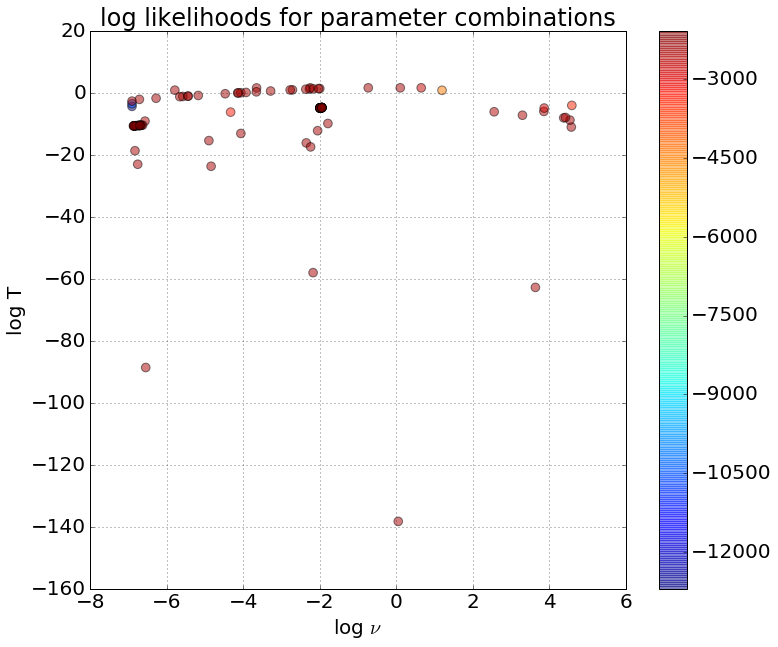

In [58]:
plt.rcParams['font.size'] = 20.0
plt.figure(figsize=[12.0, 10.0])
plt.scatter(np.log(nu), np.log(T), c=ll, s=75, alpha=0.5)
plt.xlabel(r'log $\nu$')
plt.ylabel("log T")
plt.title("log likelihoods for parameter combinations")
plt.grid()
plt.colorbar()

The parameter combination $\nu = 0.001049$ and $T = 0.000023$ has only slightly smaller log likelihood. This parameter combination corresponds to a much more recent and much more drastic population reduction. I think a likelihood ratio test would be required to see whether the data can distinguish between these two scenarios.

Maybe I should do a longer run, starting from the best-fit parameter sets found here and setting `maxiter` to something ridiculously high, so that it is guaranteed that the ML values will be found within `gtol` deviation.

In [59]:
p0 = df.sort_values(by='e_log ll', ascending=False).iloc[0, 2:4]
p_init = np.array(p0)
p_init

array([ 0.13661805,  0.00752751])

In [60]:
# create direct view of engines
dview = cl[:]

# define function to run dadi with perturbed starting values
# note the high maxiter
def run_dadi_on_ery(p_init): # for the function to be called with map, it needs to have one input variable
    """
    p_init: initial parameter values to run optimisation from
    """
    # perturb starting values by up to a factor of 2 times 'fold'
    p0 = dadi.Misc.perturb_params(p_init, fold=2, upper_bound=upper_bound, lower_bound=lower_bound)
    # run optimisation of paramters
    popt = dadi.Inference.optimize_log(p0=p0, data=fs_ery, model_func=func_ex, pts=pts_l, \
                                   lower_bound=lower_bound, upper_bound=upper_bound, \
                                   verbose=0, maxiter=1e9, full_output=False)
    return popt # returns a tuple with starting values and optimal nu and T

In [89]:
%pdoc run_dadi_on_ery

In [61]:
# run optimisation with perturbed initial values on all 11 engines
fine_opt_res = dview.apply_async( run_dadi_on_ery, p_init )

In [63]:
# get running time
fine_opt_res.wall_time

6.558749

This toke only 6 seconds to compute on 11 engines.

In [64]:
# get optimised parameters
fine_opt_res.get()

[array([ 0.14256237,  0.00832862]),
 array([ 0.13640355,  0.00751942]),
 array([ 0.13640355,  0.00751942]),
 array([ 0.13640362,  0.00751942]),
 array([ 0.13641597,  0.00751976]),
 array([ 0.13650859,  0.00753115]),
 array([  1.24217027e-03,   2.75412765e-05]),
 array([ 0.14256748,  0.00832893]),
 array([ 0.13640355,  0.00751943]),
 array([ 0.13666684,  0.00753417]),
 array([ 0.13640454,  0.00751943])]

In [65]:
# run get_ll on all sets of parameters in parallel
ll = get_ll.map(fine_opt_res.get())
ll

[-2078.2890514635992,
 -2078.0676728228846,
 -2078.0676728230906,
 -2078.0676726287252,
 -2078.0676410509236,
 -2078.0674112379847,
 -2093.7365024972123,
 -2078.2890336421278,
 -2078.0676723880715,
 -2078.0672265318244,
 -2078.0676708505089]

In [77]:
nu_opt = [p[0] for p in fine_opt_res.get()]
T_opt = [p[1] for p in fine_opt_res.get()]

df = pd.DataFrame({
        'a_nu' : nu_opt,
        'b_T' : T_opt,
        'c_ll' : ll
    })
df

,a_nu,b_T,c_ll
0,0.142562,0.008329,-2078.289051
1,0.136404,0.007519,-2078.067673
2,0.136404,0.007519,-2078.067673
3,0.136404,0.007519,-2078.067673
4,0.136416,0.007520,-2078.067641
5,0.136509,0.007531,-2078.067411
6,0.001242,0.000028,-2093.736502
7,0.142567,0.008329,-2078.289034
8,0.136404,0.007519,-2078.067672
9,0.136667,0.007534,-2078.067227


There are still three outlier results. Maybe I need to use a different optimsiation function.

#### residual plots

I would like to comparisons between model predicted and observed SFS for a couple of optimisation results.

In [78]:
p_init

array([ 0.13661805,  0.00752751])

In [85]:
# calculate the best-fit model SFS given the paramter combination with the highest likelihood
expected_sfs = func_ex(p_init, ns, pts_l)
expected_sfs.fold()

Spectrum([-- 0.7645601249967013 0.482793721656987 0.3514866265438067
 0.27731775125481994 0.2307336013956708 0.19929111074338884
 0.17694468856295759 0.1604562975077982 0.14795888897391113
 0.13831155314505694 0.13078418733374658 0.12489242853509464
 0.12030629224851823 0.11679724936415377 0.11420645592333835
 0.1124252214342582 0.1113829309381588 0.055519893550236996 -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=None)

[ 0.13661805  0.00752751]


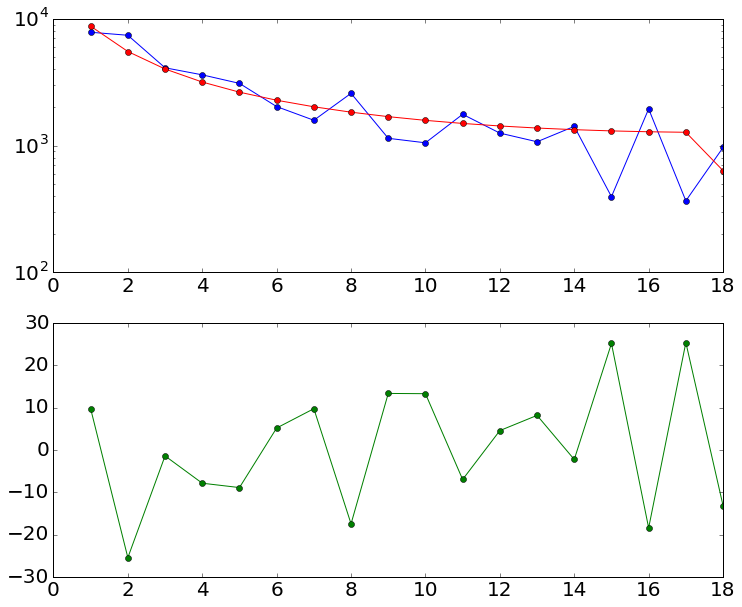

In [86]:
plt.rcParams['figure.figsize'] = [12.0, 10.0]
print(p_init)
dadi.Plotting.plot_1d_comp_multinom(expected_sfs.fold()[:19], fs_ery[:19], residual='linear')

Compared to the standard neutral model prediction, it seems that only the first frequency class has a markedly reduced residual with this model (about 20 standard deviations).

[ 0.14256237  0.00832862]


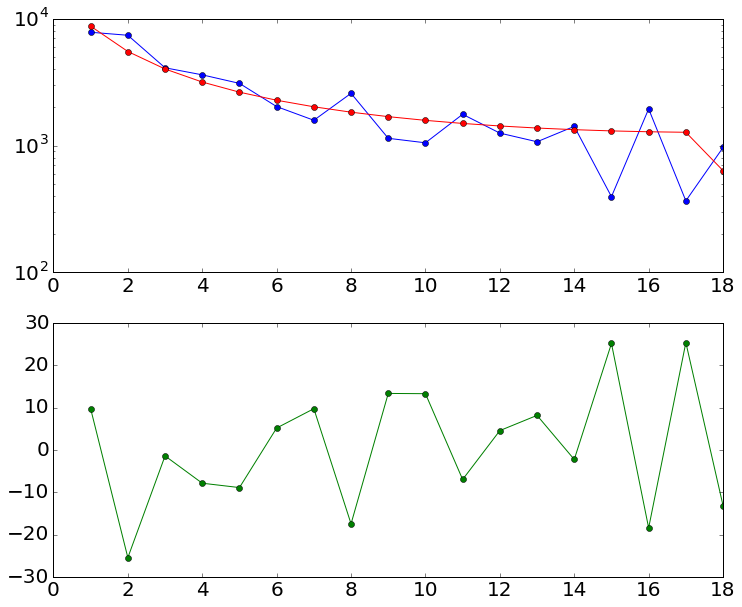

In [84]:
p = np.array(df.iloc[0, 0:2])
print(p)
expected_sfs = func_ex(p_init, ns, pts_l)
dadi.Plotting.plot_1d_comp_multinom(expected_sfs.fold()[:19], fs_ery[:19], residual='linear')

I cannot make out a clear difference between these this and the previous parameter set.

In [87]:
df

,a_nu,b_T,c_ll
0,0.142562,0.008329,-2078.289051
1,0.136404,0.007519,-2078.067673
2,0.136404,0.007519,-2078.067673
3,0.136404,0.007519,-2078.067673
4,0.136416,0.007520,-2078.067641
5,0.136509,0.007531,-2078.067411
6,0.001242,0.000028,-2093.736502
7,0.142567,0.008329,-2078.289034
8,0.136404,0.007519,-2078.067672
9,0.136667,0.007534,-2078.067227


[  1.24217027e-03   2.75412765e-05]


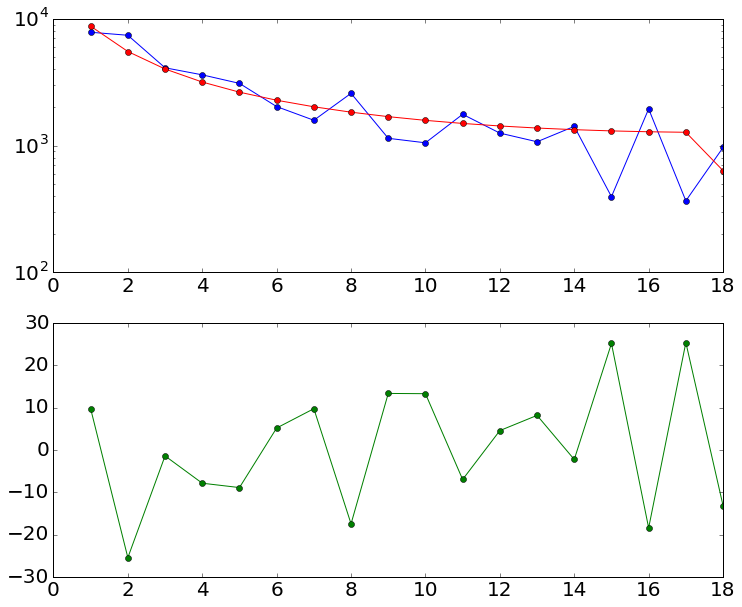

In [88]:
p = np.array(df.iloc[6, 0:2])
print(p)
expected_sfs = func_ex(p_init, ns, pts_l)
dadi.Plotting.plot_1d_comp_multinom(expected_sfs.fold()[:19], fs_ery[:19], residual='linear')

Again, even this very different parameter set seems to produce a very similar SFS to the ones produced by the two more likely parameter sets.

#### different optimisation algorithms

In [91]:
# define function to run dadi with perturbed starting values

def run_dadi_on_ery(p_init, dadi_opt_func, maxiter=100): # for the function to be called with map, it needs to have one input variable
    """
    p_init: initial parameter values to perturb and then run optimisation from
    dadi_opt_func:
        + optimize_log (BFGS based)
        + optimize_log_fmin (Nelder-Mead)
    maxiter: maximum number of iterations
    """
    # perturb starting values by up to a factor of 2 times 'fold'
    p0 = dadi.Misc.perturb_params(p_init, fold=2, upper_bound=upper_bound, lower_bound=lower_bound)
    # run optimisation of paramters
    popt = dadi_opt_func(p0=p0, data=fs_ery, model_func=func_ex, pts=pts_l, \
                                   lower_bound=lower_bound, upper_bound=upper_bound, \
                                   verbose=0, maxiter=maxiter, full_output=False)
    return popt # returns a tuple with starting values and optimal nu and T

In [92]:
%pdoc run_dadi_on_ery

Now run dadi optimisation with Nelder-Mead algorithm.

In [93]:
# run optimisation with perturbed initial values on all 11 engines
fine_opt_res = dview.apply_async( run_dadi_on_ery, p_init, dadi.Inference.optimize_log_fmin, maxiter=1e9 )

In [94]:
fine_opt_res.wall_time

2.980569

In [96]:
ll = get_ll.map( fine_opt_res.get() )

In [97]:
nu = [p[0] for p in fine_opt_res.get()]
T = [p[1] for p in fine_opt_res.get()]

df = pd.DataFrame({
        'a_nu' : nu,
        'b_T' : T,
        'c_ll' : ll
    })
df

,a_nu,b_T,c_ll
0,0.142884,0.008348,-2078.288482
1,0.136665,0.007534,-2078.067227
2,0.136659,0.007534,-2078.067226
3,0.136655,0.007534,-2078.067226
4,0.136667,0.007534,-2078.067227
5,0.001000,0.000022,-2093.696646
6,0.001000,0.000022,-2093.696646
7,0.136659,0.007534,-2078.067226
8,0.001000,0.000022,-2093.696646
9,0.001000,0.000022,-2093.696644


Half of the optimisations result in a combination of parameters that do not have the highest likelihood. So it does seem as though Nelder-Mead is more robust than BFGS (but note the random perturbation of starting values).

### _par_

#### run optimisation on 1D SFS of par

In [101]:
# create parallel function for par spectrum

@lbview.parallel(block=False)
def run_dadi_on_par(p_init): # for the function to be called with map, it needs to have one input variable
    """
    p_init: initial parameter values to run optimisation from
    """
    # run optimisation of paramters
    popt = dadi.Inference.optimize_log(p0=p_init, data=fs_par, model_func=func_ex, pts=pts_l, \
                                   lower_bound=lower_bound, upper_bound=upper_bound, \
                                   verbose=0, maxiter=100, full_output=False)
    return (p_init, popt) # returns a tuple with starting values and optimal nu and T

In [ ]:
# run dadi in parallel on all combinations of starting values
#ar = run_dadi_on_par( product(p0_nu, p0_T) )
# wait for results to come in and print progress report
#ar.wait_interactive()

  99/100 tasks finished after 3056 s

In [108]:
ar.wall_time/60

54.12214933333333

**This runs definitely too long!** `run_dadi_on_par` spends most of its time on the last three tasks. A `maxiter` of 100, therefore, does not seem to be limiting the search. Set to lower `maxiter` next time. Maybe 50.

# Recommended parameter boundaries

Ryan Gutenkunst writes on the dadi forum:
> The parameter bounds are primarily about avoiding really slow fits. Calculation with high migration rates and times or small population sizes is much slower, and the optimizer can explore extreme values before settling down. So typically we set migrations rates to be bounded [0, 20ish], times to be [0, 5ish], population sizes to be [1e-3, 1e6ish].

Maybe I should set the time parameter to something above 0. 

In [107]:
%psource dadi.Inference.optimize_log

In [109]:
# save optimsation results to file
# can be loaded back into another IPython session with: ar = pickle.load(filehandle)
# unfortunately, I cannot save the AsyncResult object with pickle (dill can save it, but emits a 
# "maximum recursion depth exceeded" error when I try to load the object from file again).
# I need to save the result as a plain list

import dill

with open("exp_growth_optim_res_PAR.pickle", "w") as fhandle:
    dill.dump(list(ar.get()), fhandle)

In [110]:
# get the optimized parameter values
popt = [p for i, p in enumerate(ar) if not (i+1) % 2]

# get the starting values
pstart = [p for i, p in enumerate(ar) if (i+1) % 2]

In [111]:
# get arrays of individual parameters from each optimisation run
nu = [p_set[0] for p_set in popt]
T = [p_set[1] for p_set in popt]
nu_start = [p_set[0][0] for p_set in pstart]
T_start = [p_set[0][1] for p_set in pstart]

In [112]:
# run get_ll on all sets of parameters in parallel
ll = get_ll.map(popt)

In [113]:
# create pandas data frame
df = pd.DataFrame({
        'a_nu_start' : nu_start,
        'b_T_start' : T_start,
        'c_nu' : nu,
        'd_T' : T,
        'e_log ll' : ll
    })
df.head()

,a_nu_start,b_T_start,c_nu,d_T,e_log ll
0,0.001,0.001000,1.391894,2.646385e-10,-2460.844590
1,0.001,0.002327,0.006427,1.449609e-09,-2460.832849
2,0.001,0.005415,0.379270,2.584976e-07,-2460.822388
3,0.001,0.012599,0.001000,1.259921e-02,-12702.278947
4,0.001,0.029317,0.001000,2.931733e-02,-10530.896299


In [114]:
df.sort_values(by='e_log ll', ascending=False).head(30)

,a_nu_start,b_T_start,c_nu,d_T,e_log ll
21,0.011072,0.002327,0.001008,0.000023,-2094.065037
31,0.036840,0.002327,0.001028,0.000019,-2099.494980
10,0.003327,0.001000,0.001650,0.000045,-2102.686355
20,0.011072,0.001000,0.001303,0.000016,-2137.540934
12,0.003327,0.005415,0.001126,0.000007,-2243.103711
51,0.407886,0.002327,0.001011,0.000006,-2246.938502
50,0.407886,0.001000,0.001099,0.000007,-2247.017555
72,4.516005,0.005415,0.001299,0.000008,-2247.608208
40,0.122583,0.001000,0.001185,0.000007,-2247.656707
61,1.357209,0.002327,0.001071,0.000006,-2247.819429


The parameter combination with the highest likelihood is not found several times from different starting values. This does _not_ give me much confidence in the maximum likelihood parameter set.

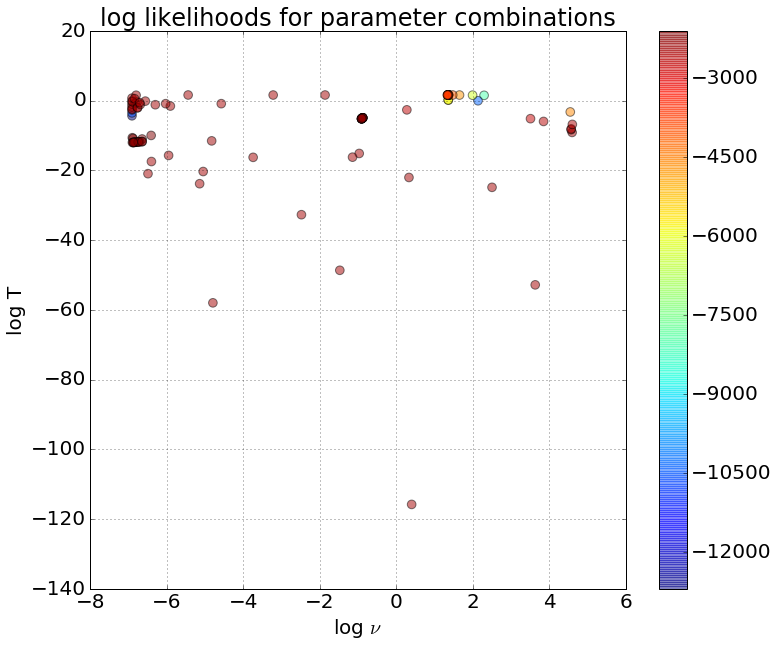

In [115]:
plt.rcParams['font.size'] = 20.0
plt.figure(figsize=[12.0, 10.0])
plt.scatter(np.log(nu), np.log(T), c=ll, s=75, alpha=0.5)
plt.xlabel(r'log $\nu$')
plt.ylabel("log T")
plt.title("log likelihoods for parameter combinations")
plt.grid()
plt.colorbar()

In [123]:
# define function to run dadi with perturbed starting values
# note the high maxiter
def run_dadi_on_par(p_init): # for the function to be called with map, it needs to have one input variable
    """
    p_init: initial parameter values to run optimisation from
    """
    # perturb starting values by up to a factor of 2 times 'fold'
    p0 = dadi.Misc.perturb_params(p_init, fold=2, upper_bound=upper_bound, lower_bound=lower_bound)
    # run optimisation of paramters
    popt = dadi.Inference.optimize_log(p0=p0, data=fs_par, model_func=func_ex, pts=pts_l, \
                                   lower_bound=lower_bound, upper_bound=upper_bound, \
                                   verbose=0, maxiter=1e9, full_output=False)
    return popt # returns optimal nu and T

In [136]:
p_init

array([  1.00793170e-03,   2.34449299e-05])

In [124]:
# get parameter combination with highest likelihood as starting values
p_init = np.array( df.sort_values(by='e_log ll', ascending=False).head().iloc[0, 2:4] )

# run optimisation with perturbed initial values on all 11 engines
fine_opt_res = dview.apply_async( run_dadi_on_par, p_init )

In [126]:
fine_opt_res.wall_time

4.348291

In [127]:
ll = get_ll.map(fine_opt_res.get())

In [128]:
nu_opt = [p[0] for p in fine_opt_res.get()]
T_opt = [p[1] for p in fine_opt_res.get()]

df = pd.DataFrame({
        'a_nu' : nu_opt,
        'b_T' : T_opt,
        'c_ll' : ll
    })
df

,a_nu,b_T,c_ll
0,0.001162,0.000007,-2246.163519
1,0.001007,0.000006,-2246.462816
2,0.001052,0.000006,-2247.938397
3,0.001011,0.000006,-2250.287178
4,0.001135,0.000007,-2249.651380
5,0.001042,0.000006,-2248.674700
6,0.001018,0.000005,-2266.009571
7,0.001251,0.000007,-2250.637184
8,0.001076,0.000006,-2251.004846
9,0.001024,0.000006,-2245.780317


None of these parameter combinations is the most likely determined above! I can therefore not be very confident that I have found the most likely parameter combination.

Maybe another optimisation algorithm is better at finding the global maximum.

In [129]:
# define function to run dadi with perturbed starting values

def run_dadi_optimisation(p_init, dadi_opt_func, sfs, maxiter=100): # for the function to be called with map, it needs to have one input variable
    """
    p_init: initial parameter values to perturb and then run optimisation from
    dadi_opt_func:
        + optimize_log (BFGS based)
        + optimize_log_fmin (Nelder-Mead)
    sfs: ipyparallel Reference to dadi Spectrum object (previously imported into all engines)
    maxiter: maximum number of iterations
    """
    # perturb starting values by up to a factor of 2 times 'fold'
    p0 = dadi.Misc.perturb_params(p_init, fold=2, upper_bound=upper_bound, lower_bound=lower_bound)
    # run optimisation of paramters
    popt = dadi_opt_func(p0=p0, data=sfs, model_func=func_ex, pts=pts_l, \
                                   lower_bound=lower_bound, upper_bound=upper_bound, \
                                   verbose=0, maxiter=maxiter, full_output=False)
    return popt # returns a tuple with starting values and optimal nu and T

In [130]:
from ipyparallel import Reference

In [131]:
sfs = Reference('fs_par')

In [132]:
# run optimisation with perturbed initial values on all 11 engines
# use Nelder-Mead algorithm this time
fine_opt_res = dview.apply_async( run_dadi_optimisation, \
                                 p_init, dadi.Inference.optimize_log_fmin, sfs, maxiter=100 )

In [134]:
fine_opt_res.wall_time

2.188965

In [135]:
ll = get_ll.map(fine_opt_res.get())

nu_opt = [p[0] for p in fine_opt_res.get()]
T_opt = [p[1] for p in fine_opt_res.get()]

df = pd.DataFrame({
        'a_nu' : nu_opt,
        'b_T' : T_opt,
        'c_ll' : ll
    })
df

,a_nu,b_T,c_ll
0,0.001,0.000006,-2248.013768
1,0.001,0.000006,-2247.995102
2,0.001,0.000006,-2247.979663
3,0.001,0.000006,-2247.979720
4,0.001,0.000006,-2248.007100
5,0.001,0.000006,-2248.001680
6,0.001,0.000006,-2247.962174
7,0.001,0.000006,-2247.994312
8,0.001,0.000006,-2248.002968
9,0.001,0.000006,-2247.998602


Again, none of these parameter combinations is close to the most likely ones determined above.

Let's see how the best-fitting model and data compare to each other.

[  1.00793170e-03   2.34449299e-05]


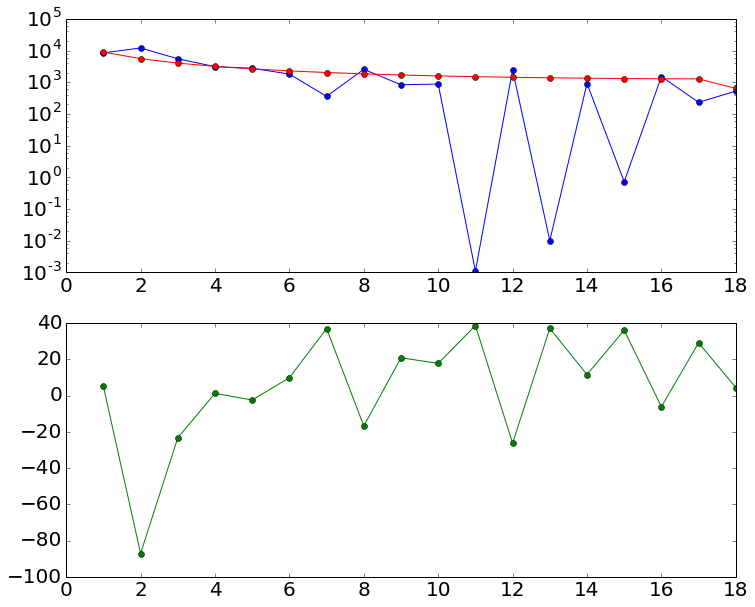

In [140]:
# calculate the best-fit model SFS given the paramter combination with the highest likelihood
expected_sfs = func_ex(p_init, ns, pts_l)

print(p_init)

dadi.Plotting.plot_1d_comp_multinom(expected_sfs.fold()[:19], fs_par[:19], residual='linear')

These logarithmic plots are not very helpfull.

[  1.00793170e-03   2.34449299e-05]


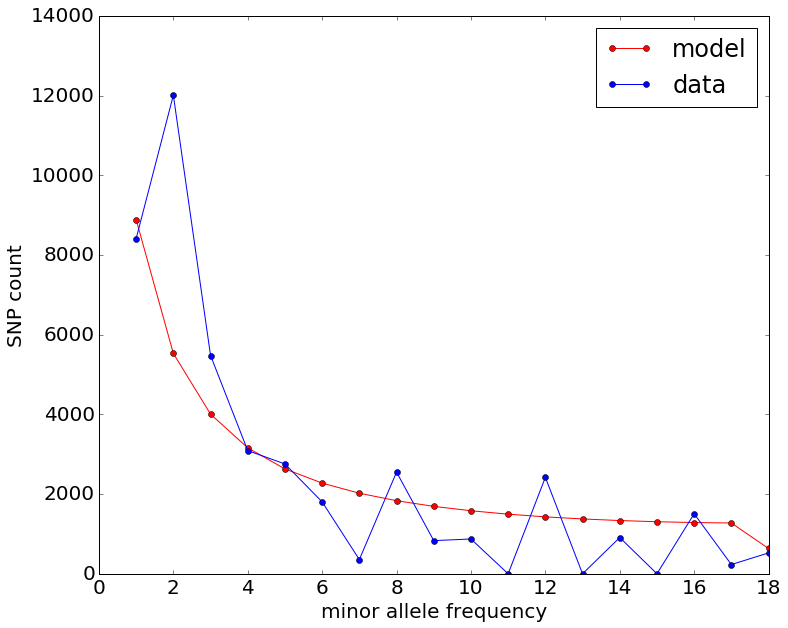

In [145]:
# get optimally scaled (by theta) expected SFS for given data
model = dadi.Inference.optimally_scaled_sfs(expected_sfs.fold(), fs_par)

print(p_init)

plt.plot(model, 'ro-', label="model")
plt.plot(fs_par[:19], 'bo-', label="data")
plt.legend()
plt.xlabel('minor allele frequency')
plt.ylabel('SNP count')

So, if I could believe the optimal parameter combination found here to be the global maximum, it would imply that the ancestral populations of the _parallelus_ sample have undergone an exponential decline to about 1/1000th of the ancient population size, $N_{ref}$ (i. e. very strong bottleneck) and this happend in the very recent past, i. e. only $2.3 \times 10^{-5} \times 2N_{ref}$ generations ago.

---

In [42]:
%time run_dadi.map(range(20))

CPU times: user 78.3 ms, sys: 8.21 ms, total: 86.5 ms
Wall time: 2min 37s


[array([ 0.04339213,  1.99168768]),
 array([ 0.14287453,  0.00833576]),
 array([ 0.1429923 ,  0.00833941]),
 array([ 0.1429303 ,  0.00833822]),
 array([ 0.13670957,  0.00752881]),
 array([ 0.13683729,  0.00753701]),
 array([ 0.14288664,  0.00833647]),
 array([ 0.13668728,  0.00752456]),
 array([ 0.66766902,  2.9846531 ]),
 array([ 0.14316723,  0.00835405]),
 array([ 0.14317739,  0.00835066]),
 array([ 0.14300519,  0.00834586]),
 array([ 0.13668148,  0.00752433]),
 array([ 0.13670402,  0.00752515]),
 array([ 0.13671334,  0.00752638]),
 array([ 0.13670086,  0.00752544]),
 array([ 0.14287374,  0.00833569]),
 array([ 0.13668495,  0.00752436]),
 array([ 0.13675139,  0.00752856]),
 array([ 0.14309811,  0.008352  ])]

Most of the time this just runs on a single core! I don't know why. Note the difference between the wall time and the total time.

Running the simulation locally on a single core:

In [44]:
%time

# import 1D spectrum of ery on all engines:
fs_ery = dadi.Spectrum.from_file('dadiExercises/ERY.FOLDED.sfs.dadi_format')

fs_ery.pop_ids = ['ery']

ns = fs_ery.sample_sizes

# create link to function that specifies a simple growth or decline model
func = dadi.Demographics1D.growth

# create extrapolating version of the function
func_ex = dadi.Numerics.make_extrap_log_func(func)

# set lower and upper bounds to nu and T
upper_bound = [100, 3]
lower_bound = [1e-2, 0]

# set starting value
p0 = [1, 1] # corresponds to constant population size

# setting the smallest grid size slightly larger than the largest population sample size (36)
pts_l = [40, 50, 60]

# perturb starting values by up to a factor of 2 times fold:
p1 = dadi.Misc.perturb_params(p0, fold=1.5, upper_bound=upper_bound, lower_bound=lower_bound)
# run optimisation of paramters
popt = dadi.Inference.optimize_log(p0=p1, data=fs_ery, model_func=func_ex, pts=pts_l, \
                               lower_bound=lower_bound, upper_bound=upper_bound, \
                               verbose=0, maxiter=100, full_output=False)
popt

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 9.06 µs


array([ 0.14288006,  0.00833607])

In [45]:
%time

# perturb starting values by up to a factor of 2 times fold:
p1 = dadi.Misc.perturb_params(p0, fold=1.5, upper_bound=upper_bound, lower_bound=lower_bound)
# run optimisation of paramters
popt = dadi.Inference.optimize_log(p0=p1, data=fs_ery, model_func=func_ex, pts=pts_l, \
                               lower_bound=lower_bound, upper_bound=upper_bound, \
                               verbose=0, maxiter=100, full_output=False)
popt

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.82 µs


array([ 0.13668664,  0.00752466])

It really shouldn't take 2 minutes to run this 20 times with different starting values.

In [46]:
%px %who

[stdout:0] 
dadi	 fs_ery	 func	 func_ex	 lower_bound	 ns	 p0	 pts_l	 time	 
upper_bound	 
[stdout:1] 
dadi	 fs_ery	 func	 func_ex	 lower_bound	 ns	 p0	 pts_l	 time	 
upper_bound	 
[stdout:2] 
dadi	 fs_ery	 func	 func_ex	 lower_bound	 ns	 p0	 pts_l	 time	 
upper_bound	 
[stdout:3] 
dadi	 fs_ery	 func	 func_ex	 lower_bound	 ns	 p0	 pts_l	 time	 
upper_bound	 
[stdout:4] 
dadi	 fs_ery	 func	 func_ex	 lower_bound	 ns	 p0	 pts_l	 time	 
upper_bound	 
[stdout:5] 
dadi	 fs_ery	 func	 func_ex	 lower_bound	 ns	 p0	 pts_l	 time	 
upper_bound	 
[stdout:6] 
dadi	 fs_ery	 func	 func_ex	 lower_bound	 ns	 p0	 pts_l	 time	 
upper_bound	 
[stdout:7] 
dadi	 fs_ery	 func	 func_ex	 lower_bound	 ns	 p0	 pts_l	 time	 
upper_bound	 
[stdout:8] 
dadi	 fs_ery	 func	 func_ex	 lower_bound	 ns	 p0	 pts_l	 time	 
upper_bound	 
[stdout:9] 
dadi	 fs_ery	 func	 func_ex	 lower_bound	 ns	 p0	 pts_l	 time	 
upper_bound	 
[stdout:10] 
dadi	 fs_ery	 func	 func_ex	 lower_bound	 ns	 p0	 pts_l	 time	 
upper_bound	 


Note, that `p1` and `popt` are not in the namespace of the remote engines. They apparently have been cleared automatically.

In [47]:
?run_dadi.map

In [48]:
lbview.block

False

Jobs submitted to the load balanced view run asynchonously in non-blocking mode.

In [52]:
cl.metadata

defaultdict(ipyparallel.client.client.Metadata, {})

In [53]:
# create serial function

def serial_run_dadi(x): # for the function to be called with map, it needs to have one input variable
    # perturb starting values by up to a factor of 2 times fold:
    p1 = dadi.Misc.perturb_params(p0, fold=1.5, upper_bound=upper_bound, lower_bound=lower_bound)
    # run optimisation of paramters
    popt = dadi.Inference.optimize_log(p0=p1, data=fs_ery, model_func=func_ex, pts=pts_l, \
                                   lower_bound=lower_bound, upper_bound=upper_bound, \
                                   verbose=0, maxiter=100, full_output=False)
    return popt # returns a numpy array of optimal nu and T

In [55]:
# run dadi optimisation in non blocking mode

ar = lbview.map(serial_run_dadi, range(20))
ar.wait_interactive()

  20/20 tasks finished after   79 s
done


In [59]:
# the sum of the computation time of all of the tasks:

ar.serial_time

202.514501

In [61]:
# the time between the first task submitted and last result received. 
# This is the actual cost of computation, including IPython overhead

ar.wall_time

79.079548

In [62]:
parallel_speedup = ar.serial_time / ar.wall_time
parallel_speedup

2.560896035976331

In [56]:
ar.get()

[array([ 0.14293278,  0.00833862]),
 array([ 0.13671848,  0.00752544]),
 array([ 0.14287156,  0.00833625]),
 array([ 0.13668198,  0.00752433]),
 array([ 0.01062642,  0.00023616]),
 array([ 0.14292392,  0.00834058]),
 array([ 0.13668133,  0.00752432]),
 array([ 0.14292099,  0.0083377 ]),
 array([ 0.13669129,  0.00752606]),
 array([ 0.13668609,  0.00752453]),
 array([ 0.14294766,  0.00833841]),
 array([ 0.13668154,  0.00752433]),
 array([ 0.13670863,  0.00752475]),
 array([ 0.1429535,  0.0083409]),
 array([ 0.14303484,  0.00834612]),
 array([ 0.1429156 ,  0.00834362]),
 array([ 0.14287413,  0.00833566]),
 array([ 0.12464263,  2.98996961]),
 array([ 0.13675166,  0.00752829]),
 array([ 0.13669101,  0.00752456])]

In [63]:
for i, r in enumerate(ar):
    print "Optimsation number %i: %.3f (nu), %.3f (T)" % (i, r[0], r[1])

Optimsation number 0: 0.143 (nu), 0.008 (T)
Optimsation number 1: 0.137 (nu), 0.008 (T)
Optimsation number 2: 0.143 (nu), 0.008 (T)
Optimsation number 3: 0.137 (nu), 0.008 (T)
Optimsation number 4: 0.011 (nu), 0.000 (T)
Optimsation number 5: 0.143 (nu), 0.008 (T)
Optimsation number 6: 0.137 (nu), 0.008 (T)
Optimsation number 7: 0.143 (nu), 0.008 (T)
Optimsation number 8: 0.137 (nu), 0.008 (T)
Optimsation number 9: 0.137 (nu), 0.008 (T)
Optimsation number 10: 0.143 (nu), 0.008 (T)
Optimsation number 11: 0.137 (nu), 0.008 (T)
Optimsation number 12: 0.137 (nu), 0.008 (T)
Optimsation number 13: 0.143 (nu), 0.008 (T)
Optimsation number 14: 0.143 (nu), 0.008 (T)
Optimsation number 15: 0.143 (nu), 0.008 (T)
Optimsation number 16: 0.143 (nu), 0.008 (T)
Optimsation number 17: 0.125 (nu), 2.990 (T)
Optimsation number 18: 0.137 (nu), 0.008 (T)
Optimsation number 19: 0.137 (nu), 0.008 (T)


In [78]:
# create serial function

def serial_run_dadi_on_data(sfs):
    """
    sfs: Spectrum object, provided to 'data' option of dadi.Inference.optimize_log
    """
    # perturb starting values by up to a factor of 2 times fold:
    p1 = dadi.Misc.perturb_params(p0, fold=1.5, upper_bound=upper_bound, lower_bound=lower_bound)
    # run optimisation of paramters
    popt = dadi.Inference.optimize_log(p0=p1, data=sfs, model_func=func_ex, pts=pts_l, \
                                   lower_bound=lower_bound, upper_bound=upper_bound, \
                                   verbose=0, maxiter=100, full_output=False)
    return popt # returns a numpy array of optimal nu and T

In [65]:
from ipyparallel import Reference

In [66]:
# create a Reference to `fs_ery` on the engines.
data = Reference('fs_ery')

In [69]:
ar = lbview.map(serial_run_dadi_on_data, [data] * 20)

In [70]:
for i, r in enumerate(ar):
    print "Optimsation number %i: %.3f (nu), %.3f (T)" % (i, r[0], r[1])

Optimsation number 0: 0.137 (nu), 0.008 (T)
Optimsation number 1: 0.143 (nu), 0.008 (T)
Optimsation number 2: 0.143 (nu), 0.008 (T)
Optimsation number 3: 0.143 (nu), 0.008 (T)
Optimsation number 4: 0.056 (nu), 0.000 (T)
Optimsation number 5: 0.143 (nu), 0.008 (T)
Optimsation number 6: 0.143 (nu), 0.008 (T)
Optimsation number 7: 0.137 (nu), 0.008 (T)
Optimsation number 8: 0.137 (nu), 0.008 (T)
Optimsation number 9: 0.137 (nu), 0.008 (T)
Optimsation number 10: 0.143 (nu), 0.008 (T)
Optimsation number 11: 0.015 (nu), 0.000 (T)
Optimsation number 12: 0.137 (nu), 0.008 (T)
Optimsation number 13: 0.137 (nu), 0.008 (T)
Optimsation number 14: 0.143 (nu), 0.008 (T)
Optimsation number 15: 0.137 (nu), 0.008 (T)
Optimsation number 16: 0.137 (nu), 0.008 (T)
Optimsation number 17: 0.703 (nu), 2.981 (T)
Optimsation number 18: 0.011 (nu), 0.000 (T)
Optimsation number 19: 0.137 (nu), 0.008 (T)


In [79]:
# run parallel optimisation on 1D SFS of par
ar = lbview.map(serial_run_dadi_on_data, [data] * 20)

# print result
for i, r in enumerate(ar):
    print "Optimsation number %i: %.3f (nu), %.3f (T)" % (i, r[0], r[1])

Optimsation number 0: 3.005 (nu), 2.896 (T)
Optimsation number 1: 2.861 (nu), 2.959 (T)
Optimsation number 2: 2.880 (nu), 2.912 (T)
Optimsation number 3: 2.896 (nu), 2.895 (T)
Optimsation number 4: 2.873 (nu), 2.972 (T)
Optimsation number 5: 2.896 (nu), 2.947 (T)
Optimsation number 6: 3.008 (nu), 2.995 (T)
Optimsation number 7: 2.923 (nu), 2.987 (T)
Optimsation number 8: 2.863 (nu), 2.996 (T)
Optimsation number 9: 0.415 (nu), 2.890 (T)
Optimsation number 10: 2.947 (nu), 2.974 (T)
Optimsation number 11: 2.966 (nu), 2.988 (T)
Optimsation number 12: 1.242 (nu), 0.000 (T)
Optimsation number 13: 2.828 (nu), 2.957 (T)
Optimsation number 14: 2.907 (nu), 2.886 (T)
Optimsation number 15: 2.980 (nu), 2.956 (T)
Optimsation number 16: 3.088 (nu), 2.972 (T)
Optimsation number 17: 2.034 (nu), 0.000 (T)
Optimsation number 18: 2.829 (nu), 2.921 (T)
Optimsation number 19: 2.999 (nu), 2.997 (T)


In [80]:
# run parallel optimisation on 1D SFS of par
# return results as they become ready (unordered)
# 3 calls of the function per task (chunksize)
ar = lbview.map(serial_run_dadi_on_data, [data] * 50, ordered=False, chunksize=3)

# print result
for i, r in enumerate(ar):
    print "Optimsation number %i: %.3f (nu), %.3f (T)" % (i, r[0], r[1])

Optimsation number 0: 3.009 (nu), 2.892 (T)
Optimsation number 1: 2.971 (nu), 2.867 (T)
Optimsation number 2: 2.829 (nu), 2.912 (T)
Optimsation number 3: 0.777 (nu), 2.828 (T)
Optimsation number 4: 1.428 (nu), 0.000 (T)
Optimsation number 5: 2.966 (nu), 2.996 (T)
Optimsation number 6: 2.940 (nu), 2.995 (T)
Optimsation number 7: 2.810 (nu), 2.900 (T)
Optimsation number 8: 3.185 (nu), 2.967 (T)
Optimsation number 9: 0.620 (nu), 2.820 (T)
Optimsation number 10: 0.819 (nu), 2.794 (T)
Optimsation number 11: 2.923 (nu), 2.951 (T)
Optimsation number 12: 2.960 (nu), 2.984 (T)
Optimsation number 13: 2.894 (nu), 2.872 (T)
Optimsation number 14: 3.003 (nu), 2.995 (T)
Optimsation number 15: 2.941 (nu), 2.970 (T)
Optimsation number 16: 2.854 (nu), 2.996 (T)
Optimsation number 17: 2.978 (nu), 2.992 (T)
Optimsation number 18: 2.879 (nu), 2.881 (T)
Optimsation number 19: 2.984 (nu), 2.973 (T)
Optimsation number 20: 2.957 (nu), 2.971 (T)
Optimsation number 21: 2.795 (nu), 2.946 (T)
Optimsation number 2

I think it should be a good idea to use load balanced views of the engines, since I think some optimisations take longer than others.

In [81]:
numpy.mean(ar[0])

2.8799245308674681

Look at `max_iter` from `dadi.Inference.optimize_log`.

# Restart analysis

Restart the kernel from the menu to clear the namespace!

In [1]:
%who

Interactive namespace is empty.


In [145]:
from ipyparallel import Client

cl = Client()

cl.ids

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [146]:
%%px --local

# run whole cell on all engines a well as in the local IPython session

import numpy as np

import sys

sys.path.insert(0, '/home/claudius/Downloads/dadi')

import dadi

Use unfolded ANGSD spectra and fold with dadi:

In [147]:
%%px --local

# import 1D spectrum of ery on all engines:
fs_ery = dadi.Spectrum.from_file('ERY.unfolded.sfs').fold()

# import 1D spectrum of ery on all engines:
fs_par = dadi.Spectrum.from_file('PAR.unfolded.sfs').fold()

In [148]:
cl[0]['fs_ery']

Spectrum([-- 8039.432178999999 7456.836488999999 4088.189565 3651.676799 3058.223166
 2076.101209 1552.623436 2635.1952370000004 1041.266513 1208.8253200000001
 1605.7045939999998 1335.552746 1125.522275 1251.596147 557.278052
 1865.4861799999999 381.14777100000003 975.251801 -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=None)

In [149]:
%%px --local

ns = fs_ery.sample_sizes # both populations have the same sample size

fs_ery.pop_ids = ['ery']
fs_par.pop_ids = ['par']

# setting the smallest grid size slightly larger than the largest population sample size (36)
pts_l = [40, 50, 60]

In [150]:
%%px --local

# create link to function that specifies the model
func = dadi.Demographics1D.growth

# create extrapolating version of the model function
func_ex = dadi.Numerics.make_extrap_log_func(func)

In [10]:
%pdoc dadi.Demographics1D.growth

In [151]:
# create load balanced view of engines

lbview = cl.load_balanced_view()

In [13]:
def run_dadi(p_init): # for the function to be called with map, it needs to have one input variable
    """
    p_init: initial parameter values to run optimisation from
    """
    if perturb == True:
        p_init = dadi.Misc.perturb_params(p_init, fold=fold, 
                                      upper_bound=upper_bound, lower_bound=lower_bound)
        # note upper_bound and lower_bound variables are expected to be in the namespace of each engine
    # run optimisation of paramters
    popt = dadi_opt_func(p0=p_init, data=sfs, model_func=func_ex, pts=pts_l, \
                                   lower_bound=lower_bound, upper_bound=upper_bound, \
                                   verbose=verbose, maxiter=maxiter, full_output=full_output)
    return p_init, popt

## Ery

The following sets global variables on the remote engines that are called by `run_dadi`:

In [13]:
%%px

# set up global variables on engines required for run_dadi function call

dadi_opt_func = dadi.Inference.optimize_log # uses BFGS algorithm
sfs = fs_ery # use ERY spectrum
perturb = False
fold = 1
maxiter = 10 # run a maximum of 20 iterations
verbose = 0
full_output = True # need to have full output to get the warnflags (see below)

This lets the optimisations run with the faster BFGS algorithm and stop after a maximum of 10 iterations. This is intended for a broad sweep across the parameter space. Also note that this sets the optimisations to fit the ery spectrum. 

In [14]:
%%px

# set lower and upper bounds to nu and T
upper_bound = [1e4, 4]
lower_bound = [1e-4, 0]

In [15]:
p0_nu = np.logspace(-3, 3, base=10.0, num=15)
p0_T = np.logspace(-3, np.log10(3), base=10, num=15)

In [16]:
from itertools import product

In [18]:
# DO NOT RUN
#ar_ery = lbview.map(run_dadi, product(p0_nu, p0_T), block=False, order=True)

In [29]:
ar_ery.progress

224

In [30]:
ar_ery.get()[0]

CompositeError: one or more exceptions from call to method: run_dadi
[Engine Exception]EngineError: Engine 'e2deff1f-c877-4369-ba2f-7228e2063b28' died while running task u'77098a31-33dd-47ff-81d4-cafe4d0a7778'

I needed to kill a single very long lasting optimisation job from the terminal (because it is not possible to do that with ipyparallel). Unfortunately that also means that the results from all 224 completed (or terminated) optimisation runs are lost as well. This is the major shortcoming of ipyparallel at the moment.

Couldn't I make ipyparallel pickle the results of the optimisations to file?

In [17]:
%%px --local

import dill # better version of pickle

In [24]:
%%px --local

# set outname stub on all engines
outname = "OUT_exp_growth_model/ERY"

In [25]:
print outname

OUT_exp_growth_model/ERY


In [28]:
i=0
for p_init in product(p0_nu, p0_T):
    i+=1
    if i > 3: break
    name = outname[:]
    for p in p_init:
        if p < 1:
            name += "_%.4f" % (p)
        else:
            name += "_%4d" % (p)
    print name

OUT_exp_growth_model/ERY_0.0010_0.0010
OUT_exp_growth_model/ERY_0.0010_0.0018
OUT_exp_growth_model/ERY_0.0010_0.0031


Now, define a new `run_dadi` function that pickles output to file:

In [84]:
def run_dadi(p_init): # for the function to be called with map, it needs to have one input variable
    """
    p_init: initial parameter values to run optimisation from
    """
    if perturb == True:
        p_init = dadi.Misc.perturb_params(p_init, fold=fold, 
                                      upper_bound=upper_bound, lower_bound=lower_bound)
        # note upper_bound and lower_bound variables are expected to be in the namespace of each engine
    # run optimisation of paramters
    popt = dadi_opt_func(p0=p_init, data=sfs, model_func=func_ex, pts=pts_l, \
                                   lower_bound=lower_bound, upper_bound=upper_bound, \
                                   verbose=verbose, maxiter=maxiter, full_output=full_output)
    # pickle to file
    import dill
    name = outname[:] # make copy of file name stub!
    for p in p_init:
        name += "_%.4f" % (p)
    with open(name + ".dill", "w") as fh:
        dill.dump((p_init, popt), fh)
    
    return p_init, popt

In [31]:
%ll

total 2216
-rw-rw-r-- 1 claudius 610985 Apr 21 13:27 01_dadi_1D_exp_growth.ipynb
-rw-rw-r-- 1 claudius 247149 Apr 19 21:23 02_dadi_1D_two_epoch.ipynb
-rw-rw-r-- 1 claudius 171168 Apr 20 09:25 03_1D_bottlegrowth.ipynb
-rw-rw-r-- 1 claudius  97558 Apr 21 12:13 04_1D_three_epoch.ipynb
-rw-rw-r-- 1 claudius 271615 Apr 21 11:39 05_1D_model_synthesis.ipynb
-rw-rw-r-- 1 claudius 118564 Apr 20 16:47 05_2D.ipynb
-rw-rw-r-- 1 claudius 444729 Apr 21 10:05 1D_models.ipynb
-rw-rw-r-- 1 claudius  33125 Apr  8 18:15 1D_two_epoch_opt_res_ERY.dill
-rw-rw-r-- 1 claudius  16613 Apr  8 19:18 1D_two_epoch_opt_res_PAR.dill
drwxrwxr-x 4 claudius   4096 Apr 20 10:19 dadiExercises/
-rw-rw-r-- 1 claudius  36308 Apr  3 20:33 ery_fold_comp.png
-rw-rw-r-- 1 claudius   3560 Mar 25 08:40 EryPar.FOLDED.2dsfs
-rw-rw-r-- 1 claudius    433 Mar 24 20:15 ERY.unfolded.sfs
-rw-rw-r-- 1 claudius    421 Mar 24 20:14 ERY.unfolded.sfs~
-rw-rw-r-- 1 claudius  13913 Apr  6 15:03 exp_growth_optim_res_ERY.pickle
-rw-rw-r-- 1 claudi

In [32]:
ar_ery = lbview.map(run_dadi, product(p0_nu, p0_T), block=False, order=True)

In [41]:
ar_ery.progress

224

I killed the last optimisation.

Load pickled output:

In [42]:
import glob

In [46]:
len( glob.glob('OUT_exp_growth_model/*dill') )

224

In [43]:
ar_ery = []

for filename in glob.glob('OUT_exp_growth_model/*dill'):
    ar_ery.append( dill.load(open(filename)) )

In [48]:
ar_ery[1]

((0.0071968567300115215, 0.95584978521729114),
 (array([ 0.00871299,  0.73813652]),
  2158.9454223189614,
  array([ 0.00295155,  0.02789772]),
  array([[ 0.62144134,  0.49035061],
         [ 0.49035061,  0.41692734]]),
  117,
  27,
  2))

Get flag count from optimisations:

In [49]:
def get_flag_count(out, NM=True):
    """
    out: list of tuples, each containing p_init and popt + additional info, including warnflags
    as produced by run_dadi.py
    """
    from collections import defaultdict
    
    if NM: # if ar from Nelder-Mead
        i = 4 # the warnflag is reported at index position 4 in the output array
    else: # ar from BFGS optimisation
        i = 6
    
    warnflag = defaultdict(int)

    for res in out:
        if res[1][i] == 1: # notice the change in indexing
            warnflag[1] +=1
        elif res[1][i] == 2:
            warnflag[2] += 1
        elif res[1][i] == 0:
            warnflag[0] += 1
        else:
            warnflag[999] +=1
    if NM:
        print "success", warnflag[0]
        print "Maximum number of function evaluations made.", warnflag[1]
        print "Maximum number of iterations reached.", warnflag[2]
        print "unknown flag", warnflag[999]
    else:
        print "success", warnflag[0]
        print "Maximum number of iterations exceeded.", warnflag[1]
        print "Gradient and/or function calls not changing.", warnflag[2]
        print "unknown flag", warnflag[999]

In [50]:
get_flag_count(ar_ery, NM=False)

success 39
Maximum number of iterations exceeded. 75
Gradient and/or function calls not changing. 110
unknown flag 0


There were 39 successfull optimisations.

Create table of results from successful optimisations:

In [53]:
def flatten(array):
    """
        Returns a list of flattened elements of every inner lists (or tuples)
        ****RECURSIVE****
    """
    import numpy
    res = []
    for el in array:
        if isinstance(el, (list, tuple, numpy.ndarray)):
            res.extend(flatten(el))
            continue
        res.append(el)
    return list( res )

In [54]:
import pandas as pd

In [59]:
i = 6 # where to find flag, 6 for BFGS, 4 for Nelder-Mead

successfull_popt_ery = [flatten(out)[:5] for out in ar_ery if out[1][i] == 0]

df = pd.DataFrame(data=successfull_popt_ery, \
                  columns=['nu_0', 'T_0', 'nu_opt', 'T_opt', '-logL'])

df.sort_values(by='-logL', ascending=True) # smaller is better

,nu_0,T_0,nu_opt,T_opt,-logL
8,19.306977,0.054772,0.128256,1.696268e-11,2172.825508
0,0.019307,0.054772,0.000414,1.836592e-14,2172.825511
9,0.002683,0.017451,0.251436,2.171300e-16,2172.825513
29,372.759372,0.001000,464.458004,2.495609e-26,2172.825513
15,372.759372,0.009851,0.173623,7.235922e-250,2172.825513
11,372.759372,0.054772,5.502193,1.729435e-42,2172.825513
19,51.794747,0.001000,44.557660,8.848950e-27,2172.825513
12,372.759372,0.001772,800.293504,7.899710e-45,2172.825513
27,1000.000000,0.097035,0.000208,2.578939e-167,2172.825513
2,372.759372,0.304550,0.011101,4.140565e-90,2172.825513


These results are completely inconclusive. I think it would make sense to limit the search space for $T$ to something well above 0 and start a few optimisations from parameter values close to a neutral model.

In [61]:
%%px

lower_bound = [1e-4, 1e-6]

In [63]:
cl[0]['lower_bound']

[0.0001, 1e-06]

In [65]:
%%px

# set up global variables on engines required for run_dadi function call

dadi_opt_func = dadi.Inference.optimize_log # uses BFGS algorithm
sfs = fs_ery # use ERY spectrum
perturb = True
fold = 1
maxiter = 10 # run a maximum of 20 iterations
verbose = 0
full_output = True # need to have full output to get the warnflags (see below)
outname = "OUT_exp_growth_model/ERY_perturb"

In [66]:
p_init = [1, 1] # this should a neutral model, i. e. constant population size

In [67]:
from itertools import repeat

ar_ery = lbview.map(run_dadi, repeat(p_init, 20), block=False, order=True)

In [69]:
ar_ery.progress

20

In [70]:
get_flag_count(ar_ery, NM=False)

success 0
Maximum number of iterations exceeded. 17
Gradient and/or function calls not changing. 3
unknown flag 0


None of these optimisations was able to converge on optimal parameter values.

In [71]:
%ll OUT_exp_growth_model/ERY_perturb*

-rw-rw-r-- 1 claudius 361 Apr 21 14:17 OUT_exp_growth_model/ERY_perturb_0.5108_0.5106.dill
-rw-rw-r-- 1 claudius 361 Apr 21 14:17 OUT_exp_growth_model/ERY_perturb_0.5199_0.8991.dill
-rw-rw-r-- 1 claudius 361 Apr 21 14:17 OUT_exp_growth_model/ERY_perturb_0.5283_1.dill
-rw-rw-r-- 1 claudius 361 Apr 21 14:17 OUT_exp_growth_model/ERY_perturb_0.5481_0.5022.dill
-rw-rw-r-- 1 claudius 361 Apr 21 14:17 OUT_exp_growth_model/ERY_perturb_0.5896_0.8951.dill
-rw-rw-r-- 1 claudius 361 Apr 21 14:17 OUT_exp_growth_model/ERY_perturb_0.6680_0.8415.dill
-rw-rw-r-- 1 claudius 361 Apr 21 14:17 OUT_exp_growth_model/ERY_perturb_0.7435_1.dill
-rw-rw-r-- 1 claudius 361 Apr 21 14:17 OUT_exp_growth_model/ERY_perturb_0.7694_0.7215.dill
-rw-rw-r-- 1 claudius 361 Apr 21 14:17 OUT_exp_growth_model/ERY_perturb_0.7983_0.6621.dill
-rw-rw-r-- 1 claudius 361 Apr 21 14:17 OUT_exp_growth_model/ERY_perturb_0.9173_0.7006.dill
-rw-rw-r-- 1 claudius 361 Apr 21 14:17 OUT_exp_growth_model/ERY_perturb_1_0.5042.dill
-rw-rw-r-- 1 c

The perturbation has not been very effective.

In [73]:
! ls -l OUT_exp_growth_model/ERY_perturb* | wc -l

19


Why are there only 19 output files? There should be 20! Two output filenames happened to be identical.

In [72]:
%%px

# use Nelder-Mead algorithm
dadi_opt_func = dadi.Inference.optimize_log_fmin 

In [74]:
! rm -f OUT_exp_growth_model/ERY_perturb*

In [75]:
! ls -l OUT_exp_growth_model/ERY_perturb* | wc -l

ls: cannot access OUT_exp_growth_model/ERY_perturb*: No such file or directory
0


In [76]:
ar_ery = lbview.map(run_dadi, repeat(p_init, 20), block=False, order=False)

In [78]:
ar_ery.elapsed

4.140403

In [79]:
get_flag_count(ar_ery, NM=True)

success 0
Maximum number of function evaluations made. 0
Maximum number of iterations reached. 20
unknown flag 0


In [80]:
%%px

# increase perturbation
fold = 3

In [81]:
ar_ery = lbview.map(run_dadi, repeat(p_init, 20), block=False, order=False)

In [82]:
ar_ery.progress

20

In [88]:
ar_ery.elapsed

12.570772

In [83]:
get_flag_count(ar_ery, NM=True)

success 0
Maximum number of function evaluations made. 0
Maximum number of iterations reached. 20
unknown flag 0


In [85]:
! rm -f OUT_exp_growth_model/ERY_perturb*

In [87]:
%%px

maxiter = 50

In [89]:
ar_ery = lbview.map(run_dadi, repeat(p_init, 20), block=False, order=False)

In [90]:
ar_ery.progress

19

In [91]:
ar_ery.elapsed

68.315382

In [92]:
get_flag_count(ar_ery, NM=True)

success 3
Maximum number of function evaluations made. 0
Maximum number of iterations reached. 17
unknown flag 0


OK. Three successful optimisations.

In [93]:
i = 4 # where to find flag, 6 for BFGS, 4 for Nelder-Mead

successfull_popt_ery = [flatten(out)[:5] for out in ar_ery if out[1][i] == 0]

df = pd.DataFrame(data=successfull_popt_ery, \
                  columns=['nu_0', 'T_0', 'nu_opt', 'T_opt', '-logL'])

df.sort_values(by='-logL', ascending=True) # smaller is better

,nu_0,T_0,nu_opt,T_opt,-logL
1,0.335609,0.129051,0.149290,0.007689,1833.629142
0,2.746970,0.232068,0.149292,0.007689,1833.629143
2,0.215795,3.681028,0.087589,3.807723,2158.944948


OK, that looks promising. Two quite different parameter combinations have lead to the same optimal parameter combination.

In [98]:
p_init = np.array( df.sort_values(by='-logL').iloc[0, 2:4] )
p_init

array([ 0.14928979,  0.00768873])

In [99]:
ar_ery = lbview.map(run_dadi, repeat(p_init, 20), block=False, order=False)

In [100]:
ar_ery.elapsed

3.86468

In [101]:
get_flag_count(ar_ery, NM=True)

success 7
Maximum number of function evaluations made. 0
Maximum number of iterations reached. 13
unknown flag 0


In [102]:
i = 4 # where to find flag, 6 for BFGS, 4 for Nelder-Mead

successfull_popt_ery = [flatten(out)[:5] for out in ar_ery if out[1][i] == 0]

df = pd.DataFrame(data=successfull_popt_ery, \
                  columns=['nu_0', 'T_0', 'nu_opt', 'T_opt', '-logL'])

df.sort_values(by='-logL', ascending=True) # smaller is better

,nu_0,T_0,nu_opt,T_opt,-logL
2,0.188054,0.014369,0.149288,0.007689,1833.629142
5,0.425439,0.001858,0.149284,0.007688,1833.629142
3,0.156933,0.051248,0.149285,0.007689,1833.629142
0,0.050689,0.044124,0.149288,0.007689,1833.629142
4,0.429060,0.018280,0.149281,0.007689,1833.629142
1,0.744235,0.059513,0.149285,0.007688,1833.629143
6,0.287111,0.008040,0.149281,0.007688,1833.629143


This looks like convergence.

In [104]:
%%px

maxiter = 100

In [105]:
ar_ery = lbview.map(run_dadi, repeat(p_init, 20), block=False, order=False)

In [107]:
ar_ery.elapsed

4.274642

This is still extremely fast!

In [106]:
get_flag_count(ar_ery, NM=True)

success 20
Maximum number of function evaluations made. 0
Maximum number of iterations reached. 0
unknown flag 0


In [108]:
i = 4 # where to find flag, 6 for BFGS, 4 for Nelder-Mead

successfull_popt_ery = [flatten(out)[:5] for out in ar_ery if out[1][i] == 0]

df = pd.DataFrame(data=successfull_popt_ery, \
                  columns=['nu_0', 'T_0', 'nu_opt', 'T_opt', '-logL'])

df.sort_values(by='-logL', ascending=True) # smaller is better

,nu_0,T_0,nu_opt,T_opt,-logL
17,0.780521,0.022607,0.149288,0.007689,1833.629142
5,0.808178,0.057064,0.149282,0.007688,1833.629142
14,0.071850,0.008328,0.149282,0.007689,1833.629142
16,0.752359,0.002897,0.149289,0.007689,1833.629142
15,0.406271,0.001194,0.149279,0.007688,1833.629143
13,0.187497,0.007036,0.149282,0.007688,1833.629143
7,0.340431,0.002261,0.149281,0.007688,1833.629143
4,0.688106,0.002398,0.149291,0.007689,1833.629143
11,0.206299,0.001830,0.149276,0.007688,1833.629143
8,0.027257,0.001609,0.000100,0.000002,1845.162845


In [111]:
# safe optimisation result to file
# dill can dump but not load an AsyncResult object

dill.dump(list(ar_ery.get()), open("OUT_exp_growth_model/ERY_perturb_ar_ery.dill", "w"))

In [114]:
test = dill.load(open("OUT_exp_growth_model/ERY_perturb_ar_ery.dill"))
get_flag_count(test, NM=True)

success 20
Maximum number of function evaluations made. 0
Maximum number of iterations reached. 0
unknown flag 0


## Par

Since starting optimisations from a broad range of initial values did not lead to useful results with the _ery_ spectrum, I am going to use the same strategy that led to a successful optimisation with _ery_: creating initial parameter values from a perturbation of parameters for a neutral model.

In [117]:
%%px

# set up global variables on engines required for run_dadi function call

dadi_opt_func = dadi.Inference.optimize_log_fmin # uses Nelder-Mead algorithm
sfs = fs_par # use PAR spectrum
perturb = True
fold = 3
maxiter = 50 # run a maximum of 50 iterations
verbose = 0
full_output = True # need to have full output to get the warnflags (see below)
outname = "OUT_exp_growth_model/PAR_perturb"

In [118]:
p_init = [1, 1]

In [119]:
ar_par = lbview.map(run_dadi, repeat(p_init, 20), block=False, order=False)

In [126]:
ar_par.elapsed/60

16.555042066666665

In [127]:
ar_par.progress

18

I needed to kill the last two processes in the terminal because they ran more than 15 minutes. I cannot use the AsyncResult object because of that and unstead need to load the pickled output from file.

In [130]:
ar_par = []

for filename in glob.glob('OUT_exp_growth_model/PAR_perturb*'):
    ar_par.append( dill.load(open(filename)) )

In [131]:
get_flag_count(ar_par, NM=True)

success 1
Maximum number of function evaluations made. 0
Maximum number of iterations reached. 17
unknown flag 0


Only 1 successful optimisation.

In [132]:
i = 4 # where to find flag, 6 for BFGS, 4 for Nelder-Mead

successfull_popt_par = [flatten(out)[:5] for out in ar_par if out[1][i] == 0]

df = pd.DataFrame(data=successfull_popt_par, \
                  columns=['nu_0', 'T_0', 'nu_opt', 'T_opt', '-logL'])

df.sort_values(by='-logL', ascending=True) # smaller is better

,nu_0,T_0,nu_opt,T_opt,-logL
0,3.082673,3.96,3.610206,3.999997,5829.879056


That is hitting the upper limit for the time parameter.

Maybe a sweep through the parameter space could help to find an optimum.

In [157]:
%%px

# set up global variables on engines required for run_dadi function call

dadi_opt_func = dadi.Inference.optimize_log # uses BFGS algorithm
sfs = fs_par # use PAR spectrum
perturb = False
fold = 3
maxiter = 10 # run a maximum of 10 iterations
verbose = 0
full_output = True # need to have full output to get the warnflags (see below)
outname = "OUT_exp_growth_model/PAR"

In [135]:
ar_par = lbview.map(run_dadi, product(p0_nu, p0_T), block=False, order=False)

In [143]:
ar_par.progress

42

In [144]:
ar_par.elapsed/60

39.3244306

Unfortunately, this is too slow. I need to abort this by stopping the cluster of engines.

In [19]:
import glob, dill

In [25]:
ar_par = []

for filename in glob.glob('OUT_exp_growth_model/PAR_[0123456789]*'):
    try:
        ar_par.append( dill.load( open(filename) ) )
    except:
        pass

In [26]:
get_flag_count(ar_par, NM=False)

success 0
Maximum number of iterations exceeded. 6
Gradient and/or function calls not changing. 36
unknown flag 0


After restarting the cluster, it is important to be EXTREMELY careful to load all required variables and modules on all engines again.

### restart

In [2]:
%who

Interactive namespace is empty.


In [27]:
! rm -f OUT_exp_growth_model/PAR_[0123456789]*

In [28]:
from ipyparallel import Client

cl = Client()

cl.ids

[2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [29]:
%%px --local

# run whole cell on all engines a well as in the local IPython session

import numpy as np

import sys

sys.path.insert(0, '/home/claudius/Downloads/dadi')

import dadi

In [30]:
%%px --local

# import 1D spectrum of ery on all engines:
fs_ery = dadi.Spectrum.from_file('ERY.unfolded.sfs').fold()

# import 1D spectrum of ery on all engines:
fs_par = dadi.Spectrum.from_file('PAR.unfolded.sfs').fold()

In [31]:
%%px --local

ns = fs_ery.sample_sizes # both populations have the same sample size

fs_ery.pop_ids = ['ery']
fs_par.pop_ids = ['par']

# setting the smallest grid size slightly larger than the largest population sample size (36)
pts_l = [40, 50, 60]

In [32]:
%%px --local

# create link to function that specifies the model
func = dadi.Demographics1D.growth

# create extrapolating version of the model function
func_ex = dadi.Numerics.make_extrap_log_func(func)

In [33]:
# create load balanced view of engines

lbview = cl.load_balanced_view()

In [34]:
%%px --local

import dill # better version of pickle

In [35]:
from itertools import product

In [36]:
def run_dadi(p_init): # for the function to be called with map, it needs to have one input variable
    """
    p_init: initial parameter values to run optimisation from
    """
    if perturb == True:
        p_init = dadi.Misc.perturb_params(p_init, fold=fold, 
                                      upper_bound=upper_bound, lower_bound=lower_bound)
        # note upper_bound and lower_bound variables are expected to be in the namespace of each engine
    # run optimisation of paramters
    popt = dadi_opt_func(p0=p_init, data=sfs, model_func=func_ex, pts=pts_l, \
                                   lower_bound=lower_bound, upper_bound=upper_bound, \
                                   verbose=verbose, maxiter=maxiter, full_output=full_output)
    import dill
    # pickle to file
    name = outname[:] # make copy of file name stub!
    for p in p_init:
        name += "_%.4f" % (p)
    with open(name + ".dill", "w") as fh:
        dill.dump((p_init, popt), fh)
    
    return p_init, popt

In [37]:
%%px

# set lower and upper bounds to nu and T
upper_bound = [1e4, 4]
lower_bound = [1e-4, 1e-6]

I am trying to reduce the initial parameter sweep.

In [38]:
p0_nu = np.logspace(-2, 2, base=10.0, num=10)
p0_T = np.logspace(-2, np.log10(2), base=10, num=10)

In [40]:
%%px

# set up global variables on engines required for run_dadi function call

dadi_opt_func = dadi.Inference.optimize_log # uses BFGS algorithm
sfs = fs_par # use PAR spectrum
perturb = False
fold = 3
maxiter = 10 # run a maximum of 10 iterations
verbose = 0
full_output = True # need to have full output to get the warnflags (see below)
outname = "OUT_exp_growth_model/PAR"

In [41]:
ar_par = lbview.map(run_dadi, product(p0_nu, p0_T), block=False, order=False)

In [51]:
def get_flag_count(out, NM=True):
    """
    out: list of tuples, each containing p_init and popt + additional info, including warnflags
    as produced by run_dadi.py
    """
    from collections import defaultdict
    
    if NM: # if ar from Nelder-Mead
        i = 4 # the warnflag is reported at index position 4 in the output array
    else: # ar from BFGS optimisation
        i = 6
    
    warnflag = defaultdict(int)

    for res in out:
        if res[1][i] == 1: # notice the change in indexing
            warnflag[1] +=1
        elif res[1][i] == 2:
            warnflag[2] += 1
        elif res[1][i] == 0:
            warnflag[0] += 1
        else:
            warnflag[999] +=1
    if NM:
        print "success", warnflag[0]
        print "Maximum number of function evaluations made.", warnflag[1]
        print "Maximum number of iterations reached.", warnflag[2]
        print "unknown flag", warnflag[999]
    else:
        print "success", warnflag[0]
        print "Maximum number of iterations exceeded.", warnflag[1]
        print "Gradient and/or function calls not changing.", warnflag[2]
        print "unknown flag", warnflag[999]

In [67]:
ar_par = []

for filename in glob.glob('OUT_exp_growth_model/PAR_[0123456789]*'):
    try:
        ar_par.append( dill.load( open(filename) ) )
    except:
        pass

In [68]:
get_flag_count(ar_par, NM=False)

success 0
Maximum number of iterations exceeded. 27
Gradient and/or function calls not changing. 73
unknown flag 0


Ok, the reduced sweep through the parameter space was not successful for the _parallelus_ spectrum. The exponential growth/decline model could not be fit to the _par_ spectrum.